In [1]:
clc;
clear;
close all;

## Plotting Data

Plotting Data


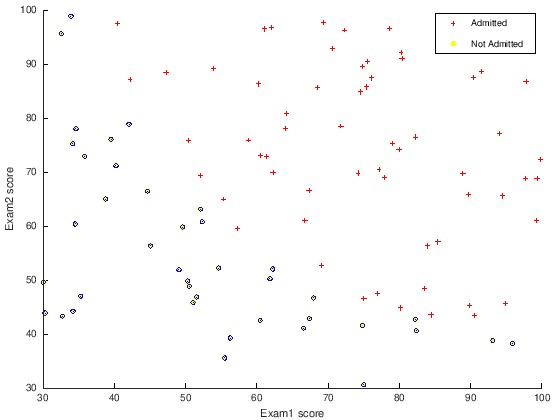

In [2]:
display('Plotting Data')
data = load('ex2data1.txt');
X = data(:,1:2);
y = data(:, 3);

pos = find(y == 1);
neg = find(y == 0);

hold on;
plot(X(pos, 1), X(pos, 2), 'r+', 'markersize', 4)
plot(X(neg, 1), X(neg, 2), 'bo', 'markerSize', 4, 'MarkerFaceColor', 'y')
legend('Admitted', 'Not Admitted')
xlabel('Exam1 score')
ylabel('Exam2 score')
hold off;


## Sigmoid Function

In [3]:
% Compute Sigmoid function
function g = sigmoid(x)
    g = zeros(size(x));
    g = 1 ./ (1 + exp(-x));
end

In [4]:
sigmoid(0)
sigmoid(1)
sigmoid(-1)

ans =  0.50000
ans =  0.73106
ans =  0.26894


In [5]:
v = [0 1; -1 2; -2 0]
sigmoid(v)

v =

   0   1
  -1   2
  -2   0

ans =

   0.50000   0.73106
   0.26894   0.88080
   0.11920   0.50000



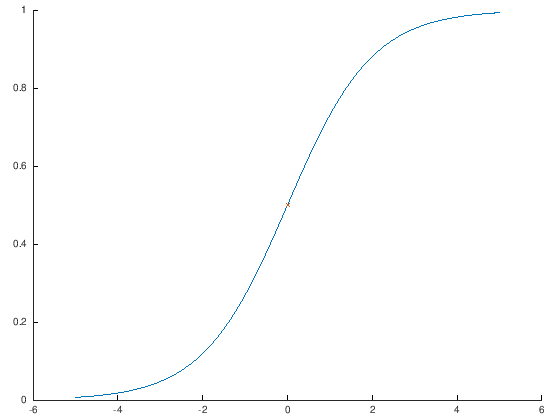

In [6]:
t = [-5:0.01:5];
v = sigmoid(t);
hold on
plot(t, v, '-')
plot(0, 0.5, 'x', 'markersize', 3)
hold off


## Cost Function

In [7]:
% Compute J function
function [J, grad] = computeCost(theta, X, y)
    m = length(y);
    h = sigmoid(X * theta);
    J = -(1/m) * sum(y .* log(h) + (1 - y) .* log(1 - h));
    grad = (1/m) * X' * (h - y);
end

In [8]:
XMat = [ones(length(y), 1), X];
theta = zeros(size(XMat)(2), 1);
[J, grad] = computeCost(theta, XMat, y)

J =  0.69315
grad =

   -0.10000
  -12.00922
  -11.26284



## Compute theta using fminunc

`fminunc` Solve an unconstrained optimization problem

In [9]:
initial_theta = zeros(size(XMat)(2), 1);
options = optimset('GradObj', 'on', 'MaxIter', 400);  % create options structure for optimization functions.
[theta, cost] = fminunc(@(t)(computeCost(t, XMat, y)), initial_theta, options)

theta =

  -25.16127
    0.20623
    0.20147

cost =  0.20350


## Plotting Decision Boundary

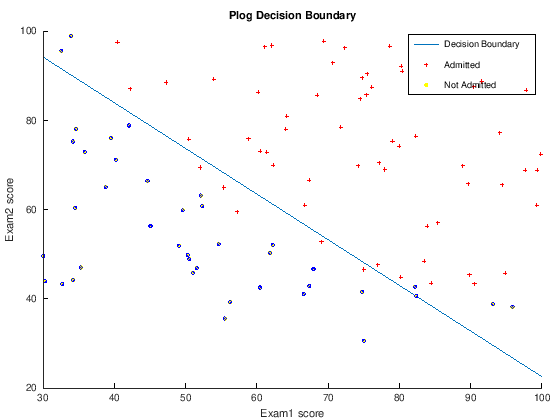

In [10]:
x1 = [30:0.1:100];
x2 = - (theta(1) + theta(2) * x1)/theta(3);
pos = find(y == 1);
net = find(y == 0);
hold on;
plot(x1, x2, '-');
plot(X(pos, 1), X(pos, 2), 'r+', 'markersize', 3)
plot(X(neg, 1), X(neg, 2), 'bo', 'markerSize', 3, 'MarkerFaceColor', 'y')
legend('Decision Boundary', 'Admitted', 'Not Admitted')
xlabel('Exam1 score')
ylabel('Exam2 score')
title('Plog Decision Boundary')
hold off;


## Prediction

In [11]:
prob = sigmoid([1 45 85] * theta)

prob =  0.77629


In [12]:
function p = predict(theta, X)
    m = size(X, 1);
    p = zeros(m, 1);
    
    v = sigmoid(X * theta);
    
    for i = 1:m
        if v(i) >= 0.5 
            p(i) = 1;
        else
            p(i) = 0;
        end
    end
end

In [13]:
p = predict(theta, XMat);
printf('Training accuracy: %f\n', mean(double(p == y)) * 100)

Training accuracy: 89.000000
